## Problem Statement
- Given the Loan data set for a Consumer finance company, the objective of the assignment is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.
- The company wants to understand the driving factors (or driver variables) behind loan default (loan_status = 'Charged Off'), i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.


## General Information
- Analyst Name : Prashant Lotlikar 
- Date Started : 02 Aug 2023
- Completion Date : 10 Aug 2023
- Data Set : As defined in Course link : https://learn.upgrad.com/course/4622/segment/38490/225106/688517/3483320
- Assignment type : EDA
- Developed as part of the Exloratory Data Analysis Module required for "Executive PG Programme in Machine Learning & AI - June 2023 "

<hr>




In [3]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import the data set into a dataframe and check basic data parameters like number of rows and columns,  
data = pd.read_csv("loan/loan.csv")
data.shape

(39717, 111)

##  Step 1 - Data Cleaning 

- data.shape() gives --> (39717, 111)

<br>

- Downloading data set into a dataframe
- Understanding dataset and its key variables
- Identify and filter out key data columns
- Data Cleaning - Missing values, duplicates, data formatting errors, find synonyms, rename columns into meaningful labels,
- Creating new Columns b breaking up data into seperate columns , data fields , etc.
- Identifying possible human errors in data set (if any)
- Deleting unwanted rows and columns
- Removing further columns basis on Domain knowledge. Like, removing the customer behaviour variables as these are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. [As per feedback from UPGRAD live session on 6 Aug 2023]
- Few columns like int_rate, term and emp_length contains text. Convert into int/float for analysis


In [5]:
# Get the total rows and columns ine the dataset
tot_rows = data.shape[0]
tot_cols = data.shape[1]
print (tot_rows,tot_cols)

39717 111


In [6]:
#Checking for null values in entire columns and removing them from the data set
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# Removing all null value columns
data.dropna(axis = 1, how = 'all', inplace = True) # Drop columns with null values
data.shape

(39717, 57)

In [8]:
# Removing a few more columns that will not help in EDA 
data.var()

id                            4.439202e+10
member_id                     7.058496e+10
loan_amnt                     5.560194e+07
funded_amnt                   5.165640e+07
funded_amnt_inv               5.081481e+07
installment                   4.362871e+04
annual_inc                    4.069645e+09
dti                           4.460361e+01
delinq_2yrs                   2.418786e-01
inq_last_6mths                1.145369e+00
mths_since_last_delinq        4.848830e+02
mths_since_last_record        1.920414e+03
open_acc                      1.936249e+01
pub_rec                       5.626382e-02
revol_bal                     2.523338e+08
total_acc                     1.299990e+02
out_prncp                     1.407547e+05
out_prncp_inv                 1.397447e+05
total_pymnt                   8.175850e+07
total_pymnt_inv               7.997139e+07
total_rec_prncp               4.992160e+07
total_rec_int                 6.802248e+06
total_rec_late_fee            5.314380e+01
recoveries 

In [9]:
# Dropping coluns where there is no variation in data. Same value , 0 or NAN. HEnce no value for EDA
data = data.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','policy_code','collections_12_mths_ex_med'],axis=1)
data.shape

(39717, 51)

In [10]:
# Further checking for unwanted columns - Get the null values , similar values in same col
data.isnull().sum()/tot_rows *100

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
pymnt_plan                  0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
i

In [11]:
# Dropping coluns where there is no variation in data. Same value , 0 or NAN. HEnce no value for EDA
data = data.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'],axis=1)

In [12]:
# Also removing few other cols like memberid,url
data = data.drop(['member_id','url'],axis=1)

In [13]:
data.shape

(39717, 45)

- Removing further columns basis on Domain knowledge. 
- Like, removing the customer behaviour variables as these are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 
- This is [As per feedback from UPGRAD live session on 6 Aug 2023]

In [14]:
behaviour_cols =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]


In [15]:
# Removing colums not required for analysis
data = data.drop(behaviour_cols, axis=1)

- Few columns like int_rate, term and emp_length  contains text. Convert into int/float for analysis


In [16]:
# removing % from int_rate col. first split the field by char %. Then take the first index to get the number. 
# Apply lambda func to apply to the entire list 

data['int_rate'] = data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [17]:
# removing 'months' from term col. use regex to strip text from col and then typecast into number

data['term'] = data['term'].str.replace('\D', '', regex=True)
data['term'] = data['term'].astype(int)

In [18]:
# removing strings from emp_length col. use regex to strip text from col 

data['emp_length'] = data['emp_length'].str.replace('\D', '', regex=True)

In [19]:
data.shape

(39717, 24)

<br>

##  Step 1 - Results - 

###  At this stage, dataset is pruned to eliminate null , unwanted columns required for EDA 

- data.shape() now gives --> (39717, 24)

<br>


##  Step 2  - Exploratory Data Analysis 

- Identified  "loan_status" as target variable
- Filtering only fully paid or charged-off. Converting to boolean and focus on "# 1 --> Charged Off" for further analysis
- Identify columns to perform Univariate analysis. 
- Perform Univariate analysis and look for patterns and report inferences if any. Ref. 
- Perform Segmented Univariate analysis and look for patterns and report inferences if any. Ref. 
- Perform Bivariate analysis and look for patterns and report inferences if any. Ref. 
- Perform Correlation analysis

In [20]:
# Columns of the data set in var "columns" for future ref
columns = data.columns
columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'initial_list_status', 'pub_rec_bankruptcies'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  int32  
 5   int_rate              39717 non-null  float64
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   sub_grade             39717 non-null  object 
 9   emp_title             37258 non-null  object 
 10  emp_length            38642 non-null  object 
 11  home_ownership        39717 non-null  object 
 12  annual_inc            39717 non-null  float64
 13  verification_status   39717 non-null  object 
 14  issue_d               39717 non-null  object 
 15  loan_status        

### Identified  "loan_status" as target variable

In [22]:
data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Filtering only fully paid or charged-off. Converting to boolean and focus on "# 1 --> Charged Off" for further analysis

In [23]:
# filtering only fully paid or charged-off 
data = data[data['loan_status'] != 'Current'] 
data['loan_status'] = data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
data['loan_status'] = data['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
data['loan_status'].value_counts()
# 0 --> Fully Paid
# 1 --> Charged Off

0    32950
1     5627
Name: loan_status, dtype: int64

## Perform Univariate analysis and look for patterns and report inferences if any. Ref.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  int32  
 5   int_rate              38577 non-null  float64
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_title             36191 non-null  object 
 10  emp_length            37544 non-null  object 
 11  home_ownership        38577 non-null  object 
 12  annual_inc            38577 non-null  float64
 13  verification_status   38577 non-null  object 
 14  issue_d               38577 non-null  object 
 15  loan_status        

### Identify columns to perform Univariate analysis.

Probably columns like : 
1. loan_amnt, 
2. term, 
3. int_rate, 
4. emp_length, 
5. grade, 
6. sub_grade, 
7. home_ownership, 
8. annual_inc, 
9. purpose, 

may be indicators for correlation with the target variable - "loan_status"

- Testing our hypothesis in the following lines of code


### 1.  Loan Amount 

<Axes: >

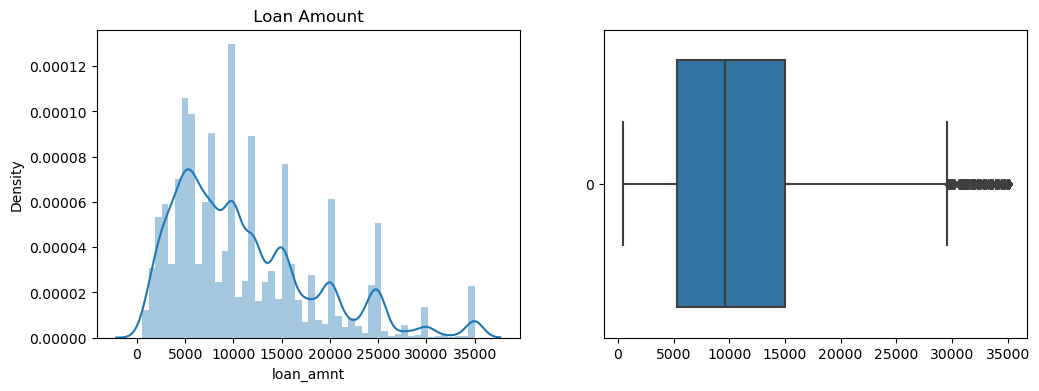

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title(" Loan Amount ")
sns.distplot(a=data['loan_amnt'])
plt.subplot(1,2,2)
sns.boxplot(data=data['loan_amnt'],orient="h")

#### 1.  Loan Amount Observations:
 - Median of distribution is 10000
 - 50 % people have taken loan between 5000 and 15000
 - Outliers to loan are after 29000, very few people have taken loans above 29000

### 2.  Term

In [26]:
print(data['term'].value_counts())

36    29096
60     9481
Name: term, dtype: int64


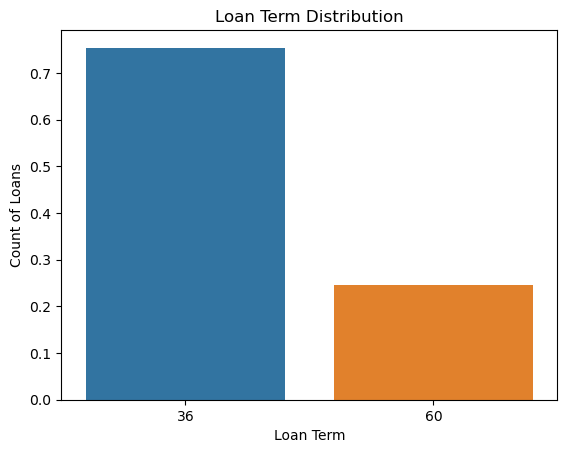

In [27]:
prob_df = data['term'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='term', data=prob_df)
plt.xlabel('Loan Term')
plt.ylabel('Count of Loans')
plt.title('Loan Term Distribution')
plt.show()

#### 2.  Loan Term Observations:
 - There are only 2 values here. 36 and 60 months
 - 75 % borrowers have taken 36 month loan term, while only 25 % borrowers have taken 60 month loan term

### 3.  Loan Interest rate 

<Axes: >

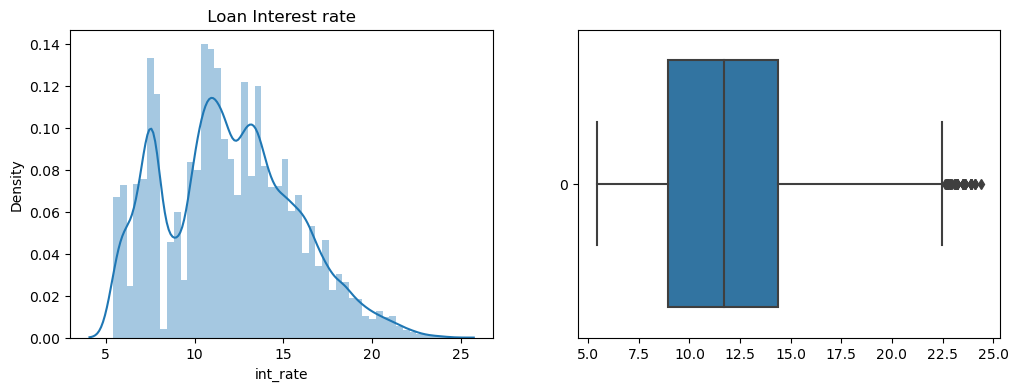

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title(" Loan Interest rate ")
sns.distplot(a=data['int_rate'])
plt.subplot(1,2,2)
sns.boxplot(data=data['int_rate'],orient="h")

In [29]:
data['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

#### 3.  Loan Interest rate Observations:
 - Median of distribution is  11.71 %
 - 50 % people have taken loan at int rate between  8.94 and 14.38
 - Outliers to Loan Interest rate are after 22.5 % , very few people have taken loans above 22.5 %

### 4.  Employment Lenght of the borrower 

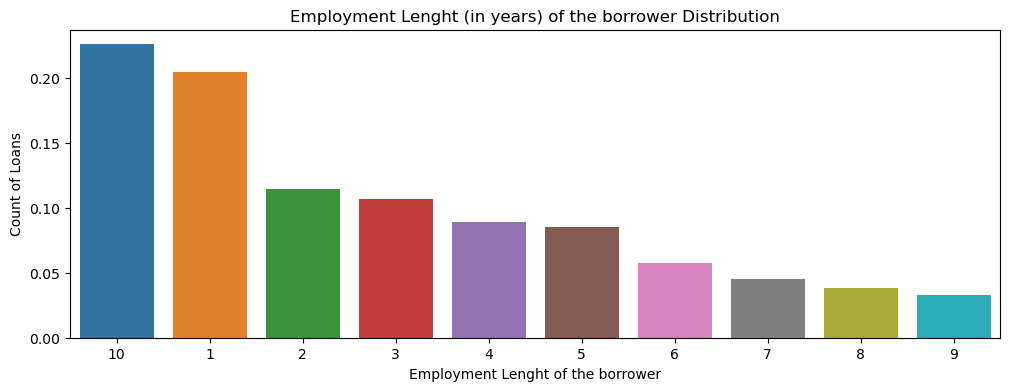

In [30]:
plt.figure(figsize=(12,4))
prob_df = data['emp_length'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='emp_length', data=prob_df)
plt.xlabel('Employment Lenght of the borrower')
plt.ylabel('Count of Loans')
plt.title('Employment Lenght (in years) of the borrower Distribution')
plt.show()

In [31]:
data['emp_length'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

10    22.6%
1     20.4%
2     11.4%
3     10.7%
4      8.9%
5      8.5%
6      5.8%
7      4.6%
8      3.8%
9      3.3%
Name: emp_length, dtype: object

<Axes: >

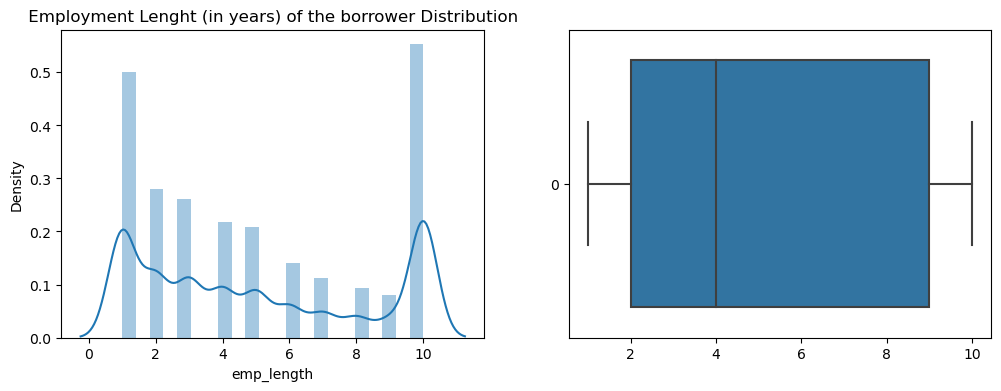

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title(" Employment Lenght (in years) of the borrower Distribution ")
sns.distplot(a=data['emp_length'])
plt.subplot(1,2,2)
sns.boxplot(data=data['emp_length'],orient="h")

#### 4  Employment Lenght of the borrower Observations:
 - Max loan applicants have employment history of more than 10 years , ie 22.6 % 
 - 50 % people have employment leangth between 2 and 9 years. Median is at 4 years


### 5/6.  Loan Grade

In [33]:
prob_data_grade = data['grade'].value_counts(normalize=True).reset_index()
prob_data_sub_grade = data['sub_grade'].value_counts(normalize=True).reset_index()

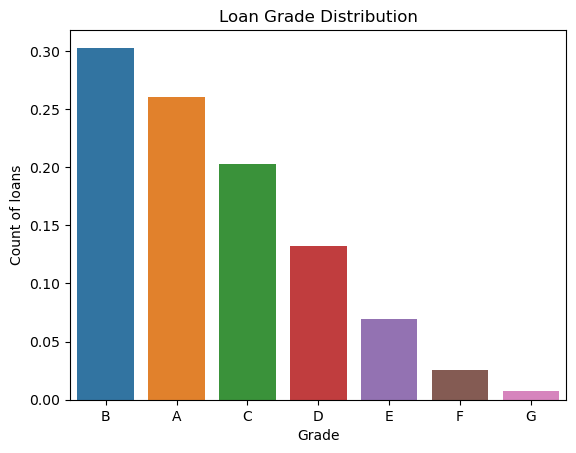

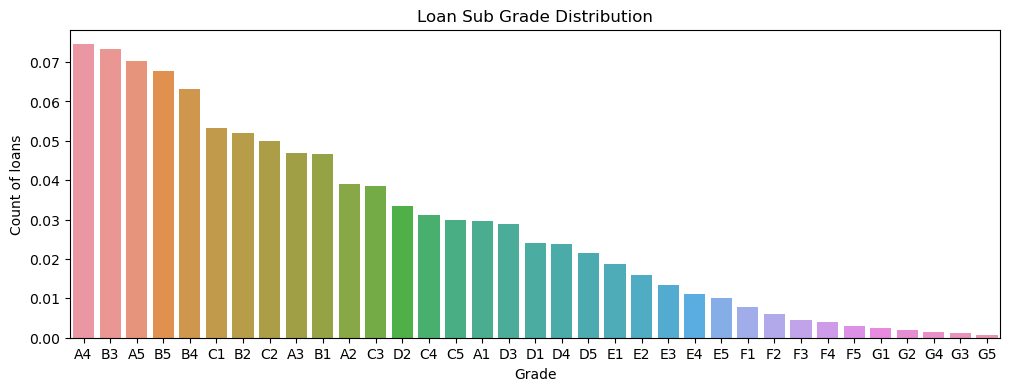

In [34]:
sns.barplot(x='index', y='grade', data=prob_data_grade)
plt.xlabel('Grade')
plt.ylabel('Count of loans')
plt.title('Loan Grade Distribution')
plt.show()

plt.figure(figsize=(12,4))
sns.barplot(x='index', y='sub_grade', data=prob_data_sub_grade)
plt.xlabel('Grade')
plt.ylabel('Count of loans')
plt.title('Loan Sub Grade Distribution')
plt.show()

#### 5/6.  Employment Lenght of the borrower Observations:
 - Most borrowers fall under A & B grades

### 7. Home Ownership

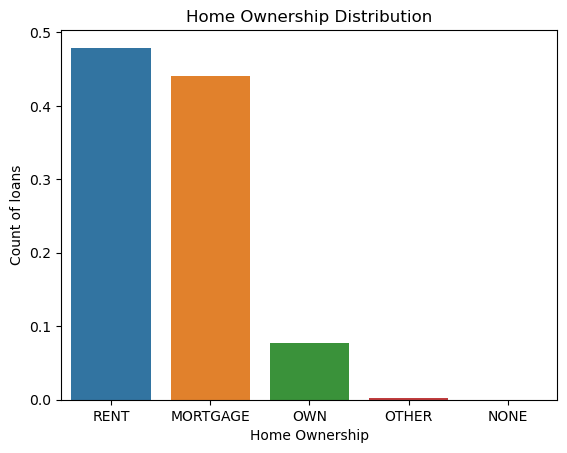

In [35]:
prob_data_home_own = data['home_ownership'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='home_ownership', data=prob_data_home_own)
plt.xlabel('Home Ownership')
plt.ylabel('Count of loans')
plt.title('Home Ownership Distribution')
plt.show()


#### 7.  Home Ownership Observations:
 - Most of the borrowers stay on rent / mortgage. Very few people own a home in the dataset

### 8.  Annual Income  

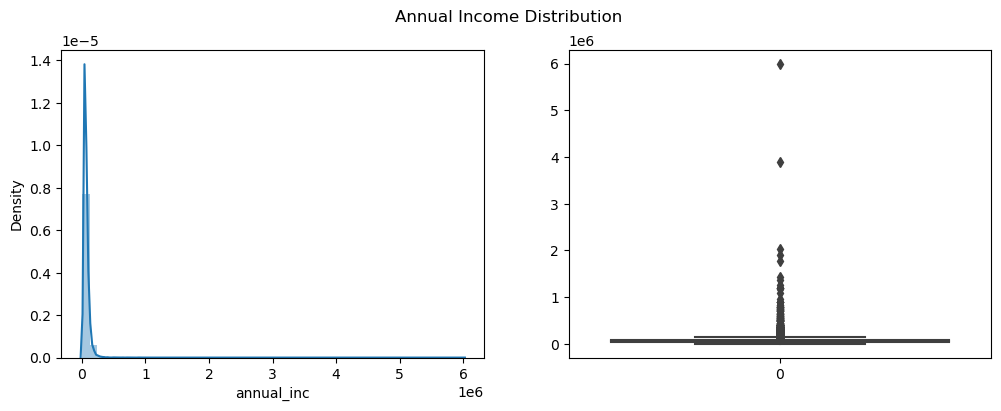

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data['annual_inc'])
plt.subplot(1,2,2)
sns.boxplot(data=data['annual_inc'])
plt.suptitle('Annual Income Distribution ')
plt.show()

In [37]:
data['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### 8.  Annual Income Observations:

 - 50 % people have annual income in range 404040  to 823040 


### 9. Purpose of the loan

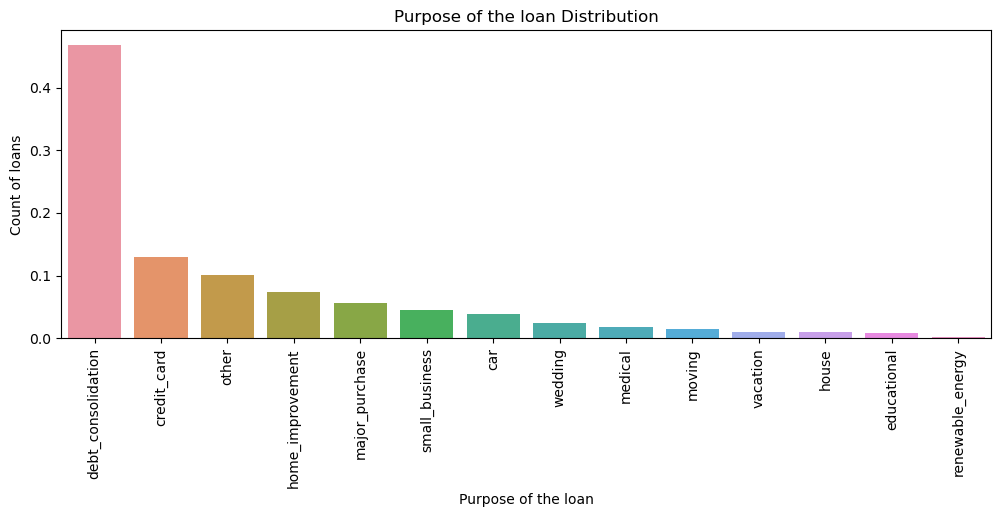

In [38]:
prob_data_home_own = data['purpose'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(12,4))

sns.barplot(x='index', y='purpose', data=prob_data_home_own)
plt.xlabel('Purpose of the loan')
plt.ylabel('Count of loans')
plt.title('Purpose of the loan Distribution')
plt.xticks(rotation='vertical')
plt.show()


#### 9.  loan Purpose Observations:
 - Debt Consolidation and Credit card seem to be the primary purpose for the loans


## Perform Segmented Univariate analysis and look for patterns and report inferences


### Identify columns to perform Segmented Univariate analysis.

Probably columns like : 
- Loan Amount
1. Loan Term vs Loan Amount & Grade vs Loan Amount
2. Home Ownership vs Loan Amount & Loan Status vs Loan Amount
3. Employment Length vs Loan Amount & Loan Purpose vs Loan Amount
- Interest Rate
4. Term vs Interest Rate & Grade vs Interest Rate
5. Loan Status vs Interest Rate & Purpose vs Interest Rate



- Testing our hypothesis in the following lines of code


### 1. Loan Term vs Loan Amount & Grade vs Loan Amount

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

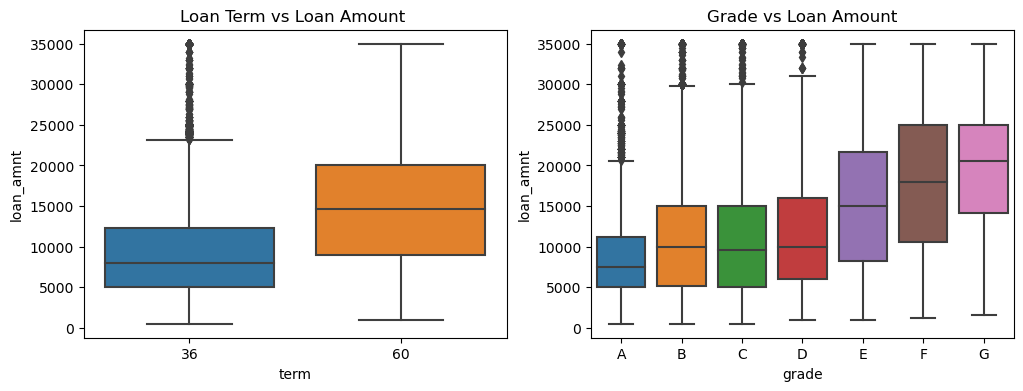

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(x='term', y=data['loan_amnt'], data=data)
plt.title('Loan Term vs Loan Amount ')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

#### 1.  Loan Term vs Loan Amount & Grade vs Loan Amount -  Observations:
- Loan amount correlates to higher tenure. i.e. Highter the loan amount, more the tenure.
- Grade 'F' and 'G' have taken maximum loan amount.

### 2. Home Ownership vs Loan Amount & Loan Status vs Loan Amount

Text(0.5, 1.0, 'loan_status vs Loan Amount')

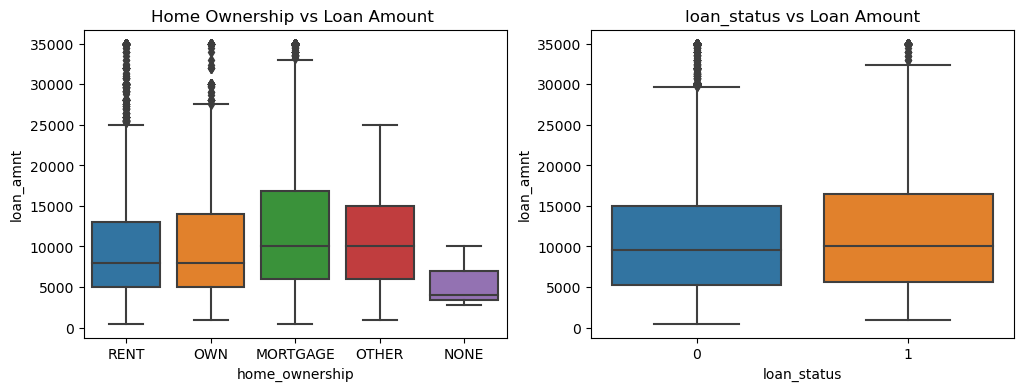

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data['loan_amnt'], data=data)
plt.title('Home Ownership vs Loan Amount ')
plt.subplot(122)
plt.title('Loan Status vs Loan Amount')
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

#### 2.  Home Ownership vs Loan Amount & Loan Status vs Loan Amount -  Observations:
- Higher Loan amount correlates to Mortgaged borrowers
- Charged Off loans have slightly higher aloan mounts than Fully Paid.

### 3. Employment Length vs Loan Amount & Loan Purpose vs Loan Amount

Text(0.5, 1.0, 'Loan Purpose vs Loan Amount')

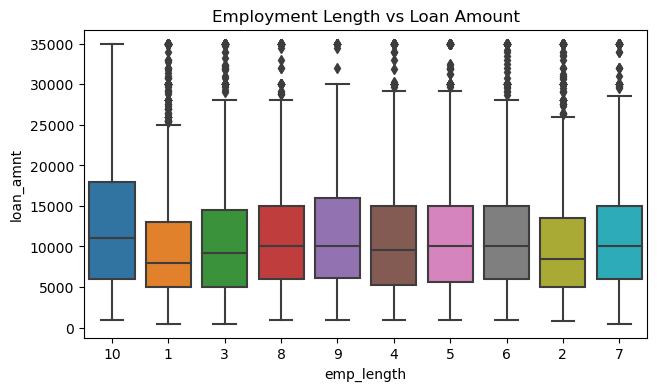

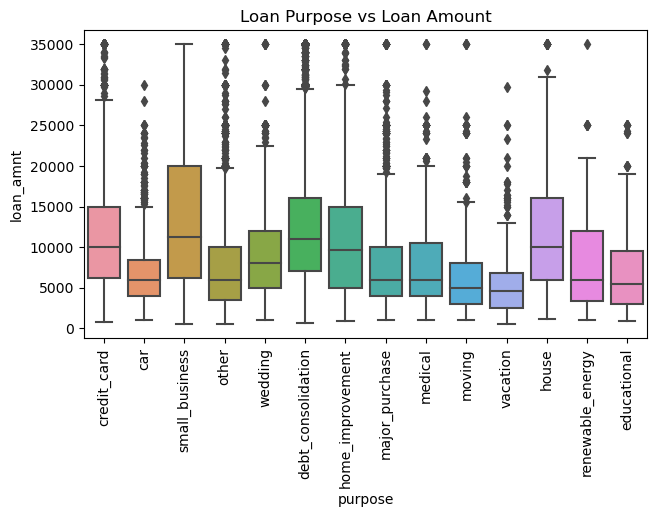

In [41]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.boxplot(x='emp_length', y=data['loan_amnt'], data=data)
plt.title('Employment Length vs Loan Amount')

plt.figure(figsize=(16,4))
plt.subplot(121)
sns.boxplot(x='purpose',  y=data['loan_amnt'], data=data)
plt.xticks(rotation=90)
plt.title('Loan Purpose vs Loan Amount')

#### 3.  Employment Length vs Loan Amount & Loan Purpose vs Loan Amount -  Observations:
- Loan amount correlates to higher emp length. i.e. 10 + years and above borowers claom more loan amount
- Loan amount is most for Small Business and least for vacations

### 4. Term vs Interest Rate & Grade vs Interest Rate

<Axes: title={'center': 'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

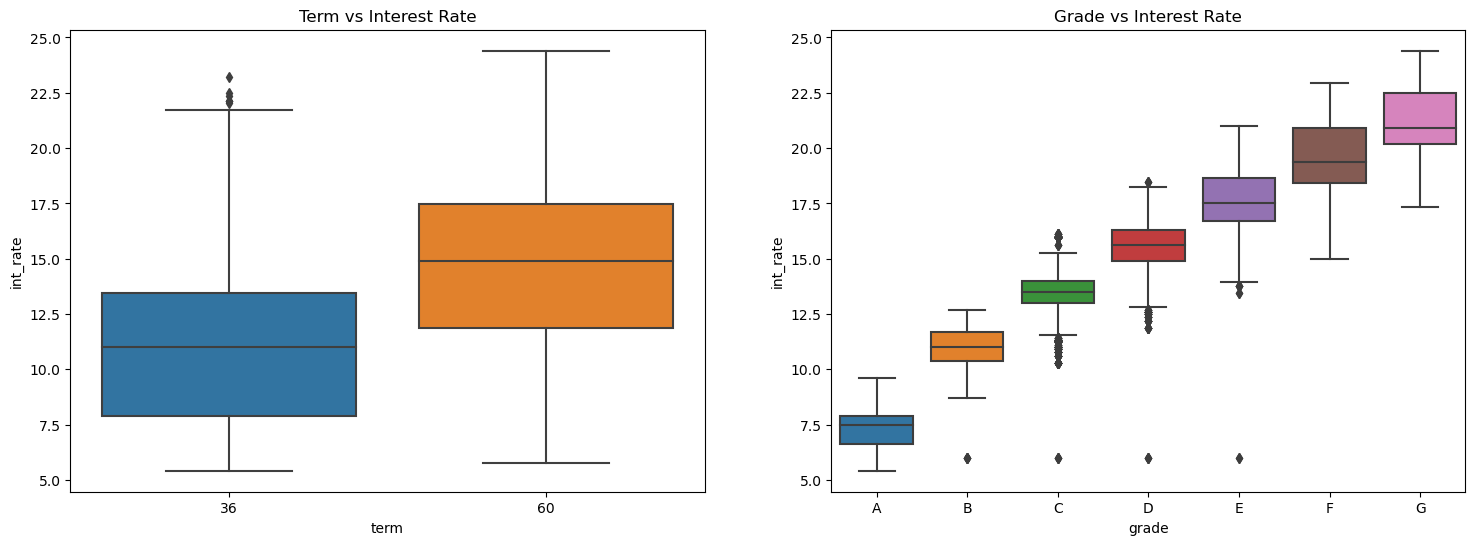

In [42]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.int_rate, order = grade_ord, data=data)

#### 4. Term vs Interest Rate & Grade vs Interest Rate -  Observations:
- Interest rates are higher for Higher tenure loans.
- And Also Interest Rates are Higher as Grades in descending order (G to A ).

### 5. Loan Status vs Interest Rate & Purpose vs Interest Rate

Text(0.5, 1.0, 'Purpose vs Interest Rate')

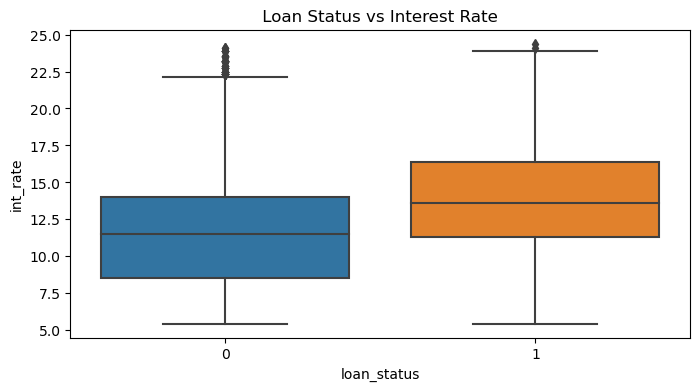

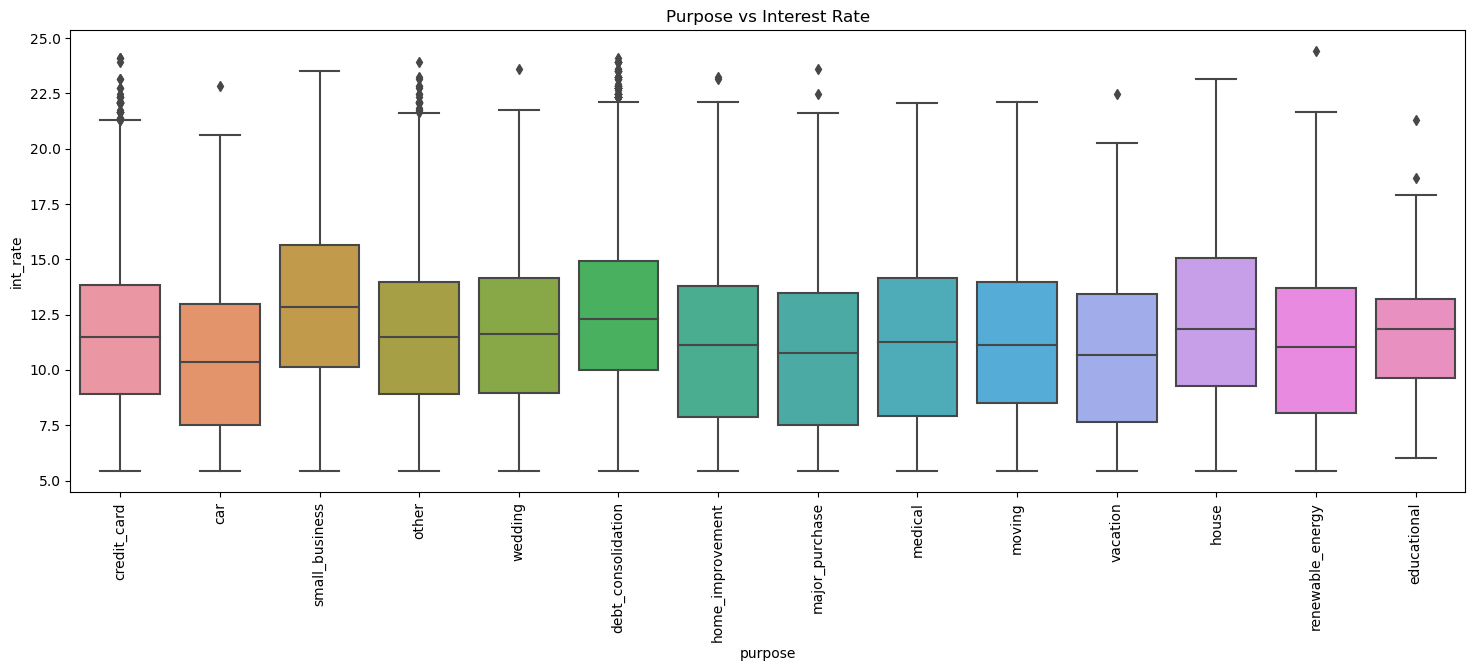

In [43]:
plt.figure(figsize=(8,4))
sns.boxplot(x='loan_status', y=data.int_rate, data=data)
plt.title(' Loan Status vs Interest Rate ')

plt.figure(figsize=(18,6))
sns.boxplot(x='purpose', y=data.int_rate, data=data)
plt.xticks(rotation=90)
plt.title('Purpose vs Interest Rate')


#### 5. Loan Status vs Interest Rate & Purpose vs Interest Rate -  Observations:
- Interest rates correspond to more defaults
- Small business followed by house loans make most defaults

## Perform Bi Univariate analysis and look for patterns and report inferences

### Identify columns to perform Bi Univariate analysis.

Probably columns like : 
1. loan_amnt vs Loan Status, 
2. term vs Loan Status, 
3. int_rate vs Loan Status, 
4. emp_length vs Loan Status, 
5. grade/Subgrade vs Loan Status, 
5. home_ownership vs Loan Status, 
7. annual_inc vs Loan Status, 
8. purpose vs Loan Status, 

may be indicators for correlation with the target variable - "loan_status"

- Testing our hypothesis in the following lines of code


In [44]:
# Define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=data)
    plt.show()
    

### 1. Loan Amount vs Loan Status

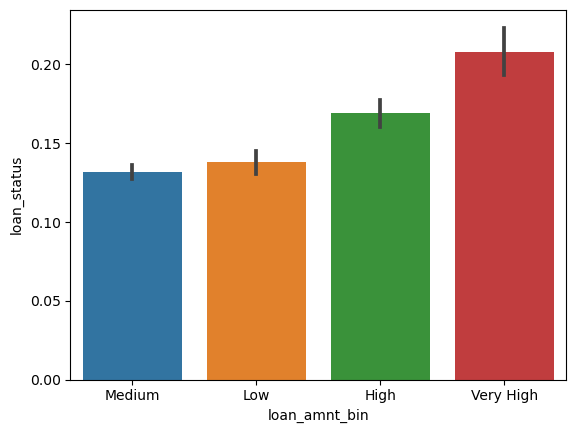

<Axes: xlabel='loan_status', ylabel='int_rate'>

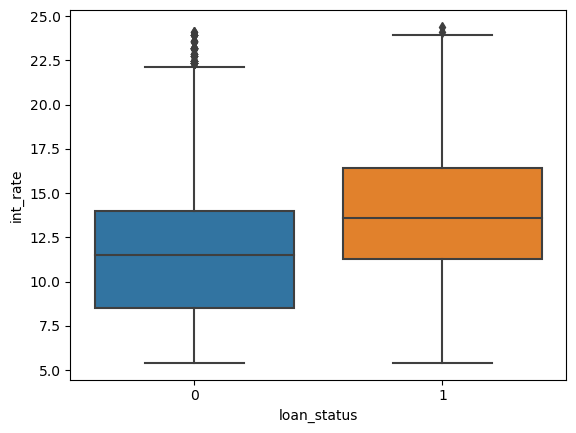

In [45]:
# binning loan amount , To make it a categorical variable

def loan_amount(n):
    if n < 5000:
        return 'Low'
    elif n >=5000 and n < 15000:
        return 'Medium'
    elif n >= 15000 and n < 25000:
        return 'High'
    else:
        return 'Very High'

# Creating a derived col

data['loan_amnt_bin'] = data['loan_amnt'].apply(lambda x: loan_amount(x))

# compare Loan Amount across loan status
plot_cat('loan_amnt_bin')

sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=data)

#### 1.  Loan Amount vs Loan Status -  Observations:
 - Higher the loan amounts, more the defaults

### 2. Loan Term vs Loan Status

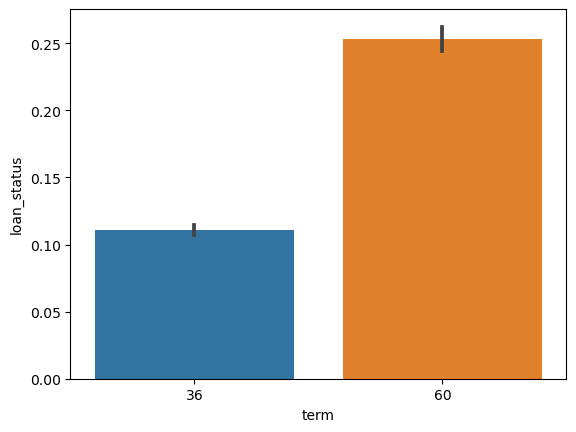

In [46]:
# compare Loan Term across loan status
plot_cat('term')

#### 2.  Loan Amount vs Loan Status -  Observations:
 - More proportion of borrowers defaulted loan in 60 months term then 36 months

### 3. Int. Rate vs Loan Status

<Axes: xlabel='loan_status', ylabel='int_rate'>

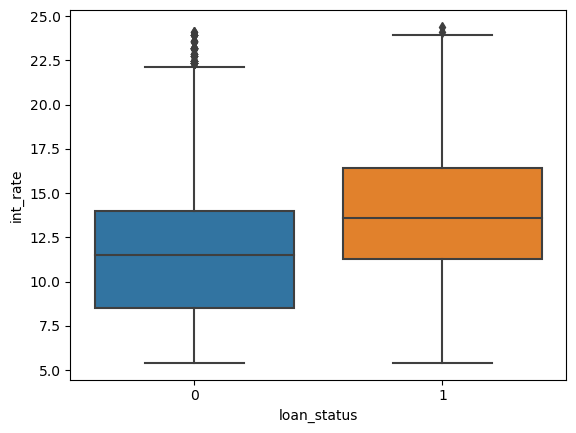

In [47]:
#Analyze the relationship between loan status and int_rate
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=data)

#### 3.  Loan Int Rates vs Loan Status -  Observations:
 - There are significantly more defaults at higher int. rates . 
 - This would imply that since the int rate is higher, load would be riskier, which correlates to more defaults

### 4. Employment Length vs Loan Status

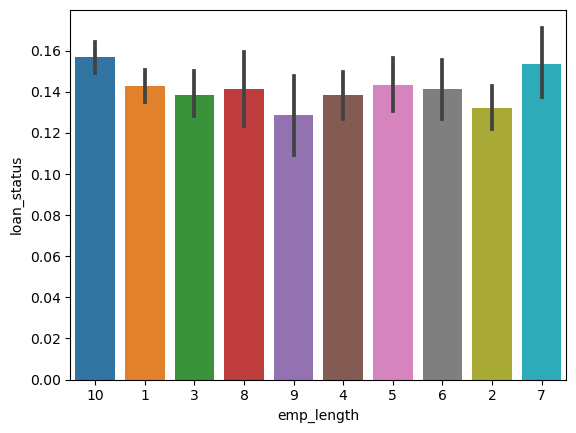

In [48]:
# compare Employment Length across loan status
plot_cat('emp_length')

#### 4.  Employment Length vs Loan Status -  Observations:
 - It is observed that there is no impact of Employment Length on loan status. The spread is almost even

### 5. Loan Grade / Sub grade vs Loan Status

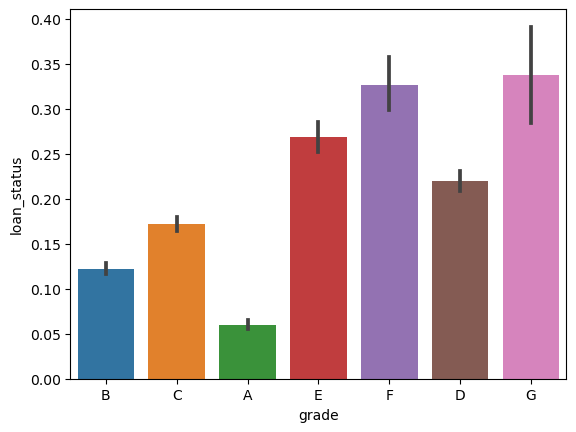

In [49]:
# compare Loan Grade across loan status
plot_cat('grade')

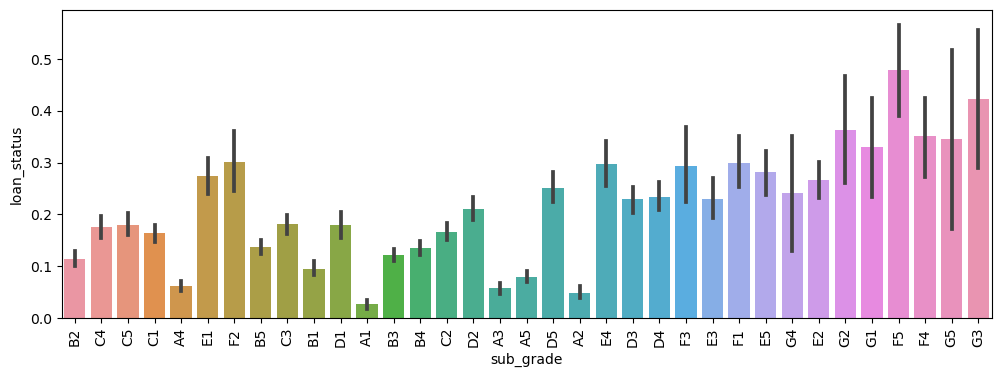

In [50]:
# compare Loan sub Grade across loan status
plt.figure(figsize=(12,4))
plt.xticks(rotation='vertical')
plot_cat('sub_grade')

#### 5.  Loan Grades/Sub grades vs Loan Status -  Observations:
 - In the alphabetical order of loan grades and sub grades, Defaults increase. 
 - Ex. Loans if Grades A and Band less prone to defaults, 
 - whereas loans of grades E, F, G and H are more likely to be charged off

### 6. Home Ownership vs Loan Status

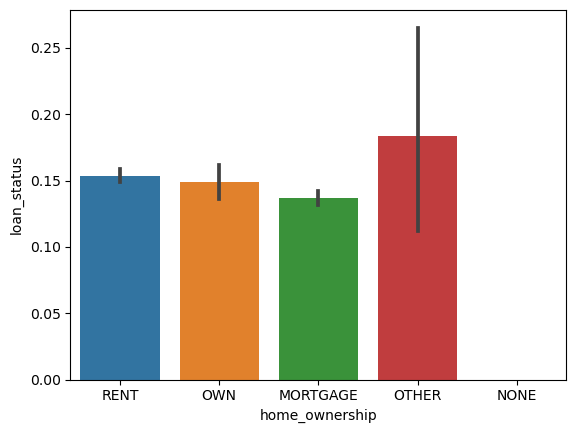

In [51]:
# compare Home Ownership across loan status
plot_cat('home_ownership')

#### 6.  Home Ownership vs Loan Status -  Observations:
- It is observed that there is no impact of Home Ownership on loan status. The spread is almost even

### 7. Annual Inc. vs Loan Status

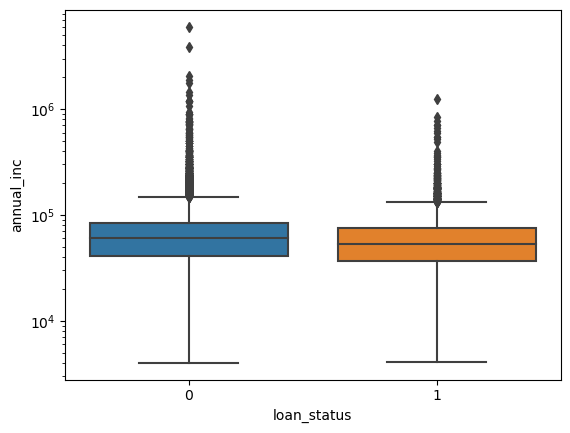

In [52]:
# compare Annual Inc. across loan status
sns.boxplot(x='loan_status', y=data['annual_inc'], data=data)
plt.yscale('log')

#### 7. Annual Inc. vs Loan Status -  Observations:
- Higher income borrowers usually have Fully Paid up Loans.

### 8. Loan Purpose  vs Loan Status

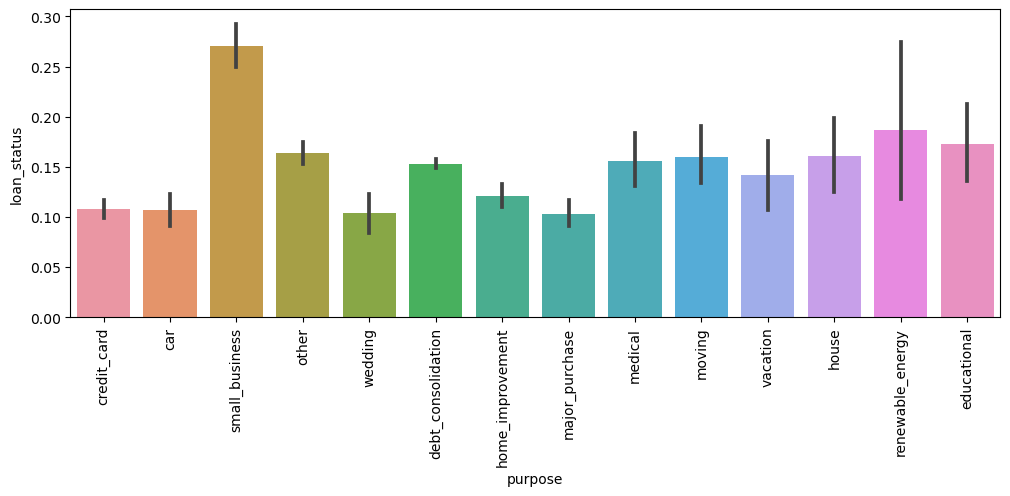

In [53]:
# compare Loan Purpose across loan status
plt.figure(figsize=(12,4))
plt.xticks(rotation='vertical')
plot_cat('purpose')

#### 8.  Loan Purpose vs Loan Status -  Observations:
- Loans taken for the purpose of small business have defaulted the most
- On the other hand, Loans taken fir wedding, credit card, car and major purchase are least defaulted

## Perform Correlation Analysis 

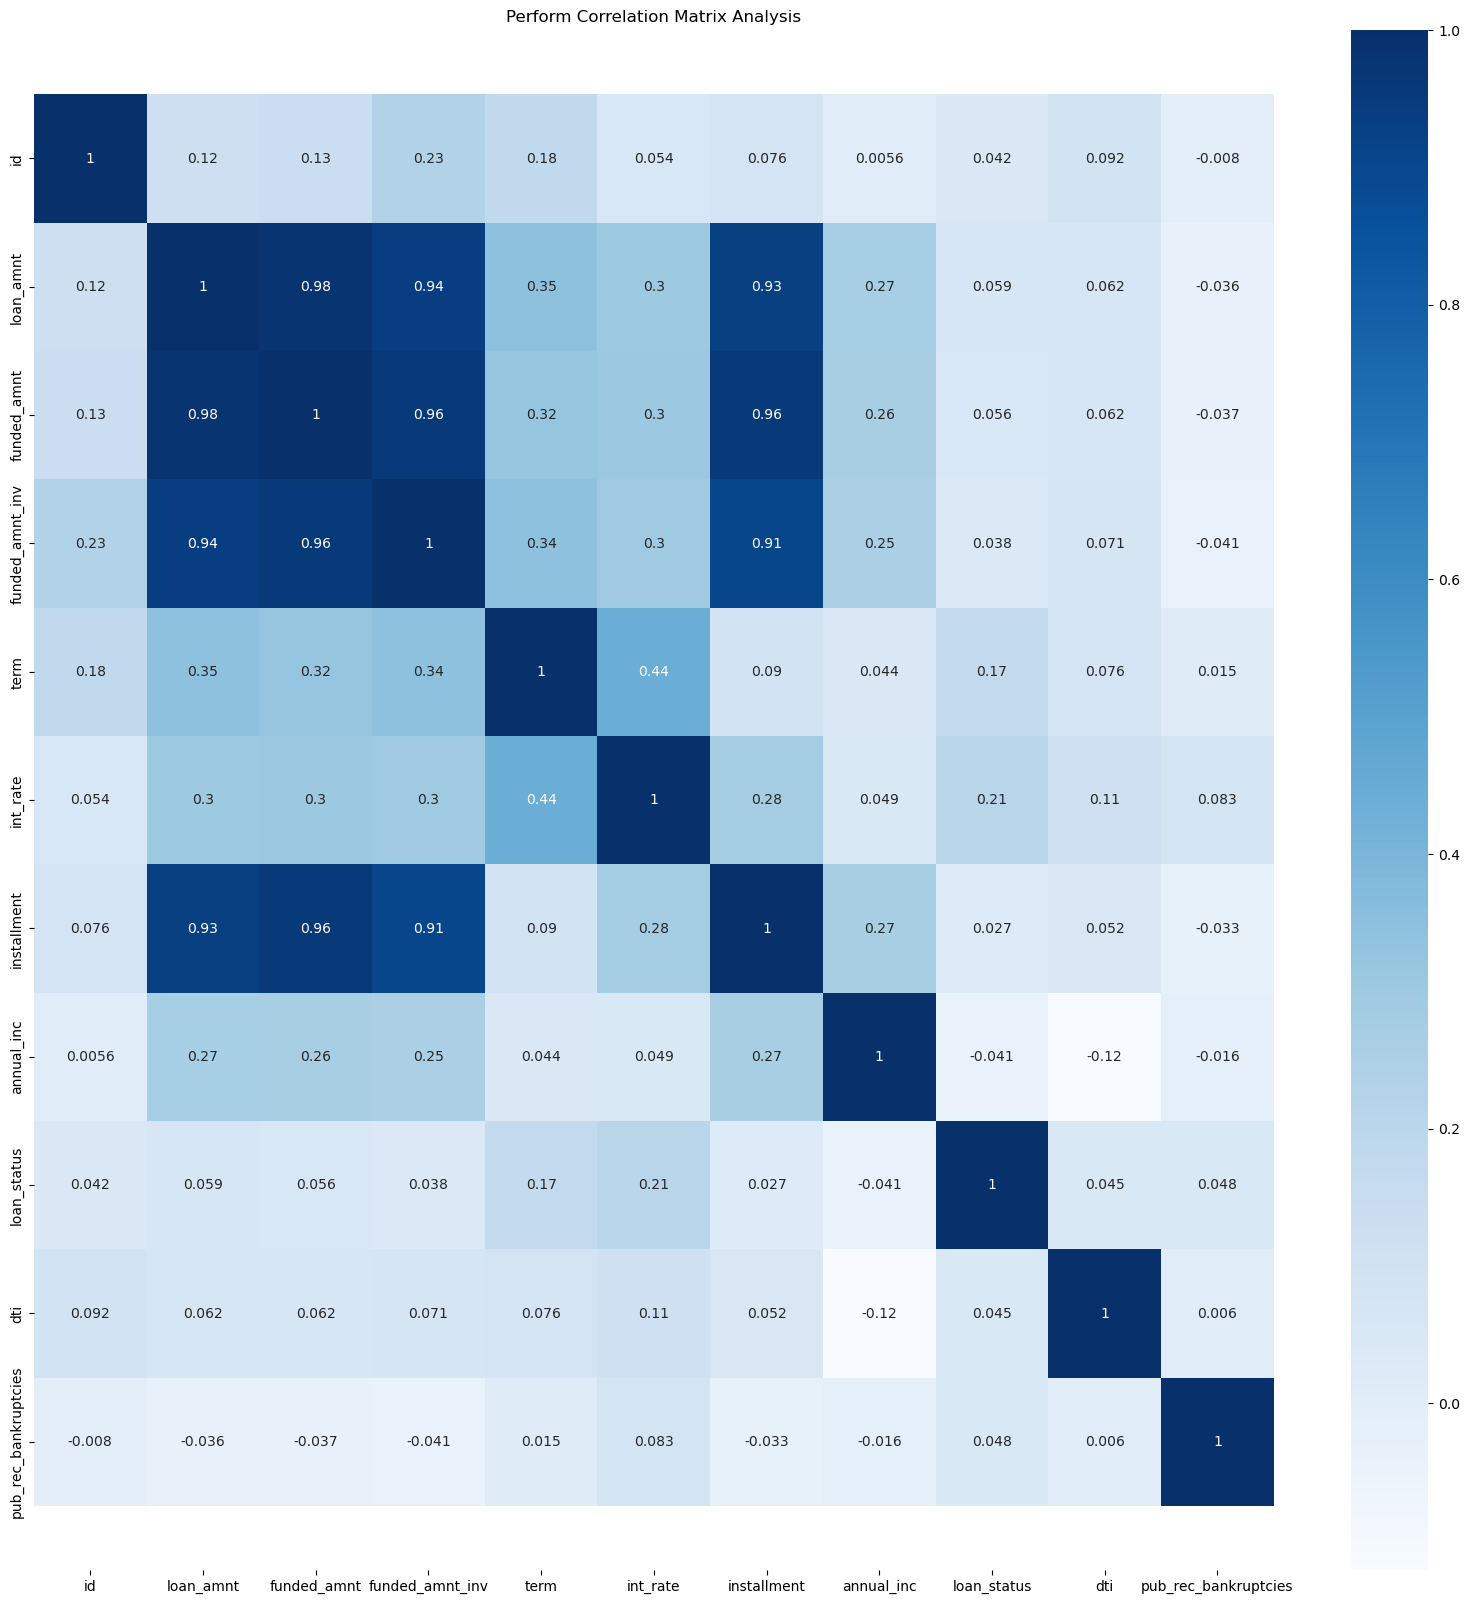

In [54]:
#Finding correlation matrix
matrix = data.corr()
plt.figure(figsize=(20,20))
#plotting Correlation Matrix on a heat map
ax = sns.heatmap(matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Perform Correlation Matrix Analysis")
plt.show()

##  Correlation Matrix Analysis Observations - 
- Int. Rate is correlated to the Installment amount and the loan amount
- loan amount, Funded Amount and Funded Amount Inv are highly correlated 

### End of EDA Activity